In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

## Figure和Axes上的文本

### 1.文本API示例
| pyplot API | OO API  | description  |
| ---------- | ------- | ------------ |
| `text` | `text` | 在子图axes的任意位置添加文本|
| `annotate` | `annotate` | 在子图axes的任意位置添加注解，包含指向性的箭头|
| `xlabel` | `set_xlabel` | 为子图axes添加x轴标签 |
| `ylabel` | `set_ylabel` | 为子图axes添加y轴标签 |
| `title` | `set_title` | 为子图axes添加标题 |
| `figtext` | `text` | 在画布figure的任意位置添加文本  |
| `suptitle` | `suptitle` | 为画布figure添加标题 |

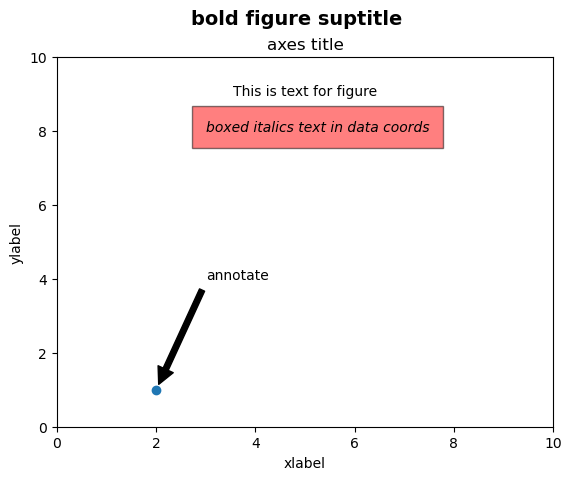

In [4]:
# 以OO模式(创建实例对象模式)展示如何添加文本
fig,ax = plt.subplots()

# 分别为figure和ax设置标题。注意两者的位置是不同的
fig.suptitle('bold figure suptitle',fontsize=14,fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x轴y轴显示范围为0-10
ax.axis([0,10,0,10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05));


### 2.text-子图上的文本
- axes.text(x,y,s,fontdict,**kwargs)
    - x,y为文本的出现位置，默认当前坐标系下的坐标值
    - s为文本内容
    - fontdict可选参数用于覆盖默认文本属性
    - **kwargs关键字参数，也可用于传入文本样式参数
    - bbox You can put a rectangular box around the text instance (e.g., to set a background color) by using the keyword bbox.
- 重点解释下fontdict和**kwargs参数，这两种方式都可以用于调整呈现的文本样式，最终效果是一样的，不仅text方法，其他文本方法如set_xlabel,set_title等同样适用这两种方式修改样式。

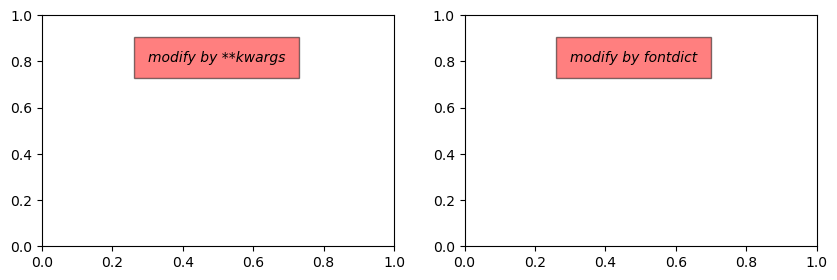

In [6]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);
